In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

%matplotlib inline

#Read File
data = pd.read_csv('bmarathon2014.csv')
#data.columns = ['Division', 'Name', 'City', 'Gender', 'Age', 'Official', 'Bib', 'Overall', 'State', 'Genderdiv', 'Net', 'Country']
#data = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)
# Number of rows and columns
print(data.shape)

#data.dropna(inplace=True)
data.head(10)

(31984, 21)


,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


# Explore Data

In [2]:
for i in data.columns:
    print(data[i].value_counts())

-         50
48.38     47
48.97     47
48.75     42
48.02     42
48.87     41
49.42     41
47.62     41
48.30     40
48.95     40
47.88     40
49.47     39
47.20     38
48.28     38
48.17     37
48.65     37
48.03     37
49.88     37
47.13     37
49.30     37
47.80     36
49.03     36
49.32     36
50.05     36
49.02     36
42.35     36
48.08     36
48.25     36
49.73     36
47.95     36
          ..
80.82      1
112.38     1
75.35      1
76.38      1
75.50      1
83.98      1
32.13      1
76.93      1
91.73      1
94.45      1
74.13      1
88.43      1
94.75      1
36.67      1
32.37      1
77.93      1
66.12      1
80.45      1
105.53     1
35.45      1
32.92      1
76.57      1
76.25      1
35.73      1
33.28      1
35.12      1
33.15      1
35.85      1
79.67      1
73.55      1
Name: 10k, Length: 2766, dtype: int64
O'Brien, Michael P.         2
Johnson, Patrick            2
Black, David                2
Kennedy, Michael            2
Baynes, Chris               2
Girard, Mathieu    

Here we can tell that Genderdiv, Division and Bib all have only one instance. Therefore they won't add much to our data and can be dropped.

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB
None


In [4]:
#Select all columns that havee the data type of 'object'
#cols = data.columns[data.dtypes.eq('object')]
cols = ['10k', '35k', 'division', '25k', 'age', 'official', 'genderdiv', 'overall', 'pace', '30k', '5k', 'half', '20k', '40k']
print(cols)
# change all data to numeric type 'int'
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', downcast='float')
data.head()

['10k', '35k', 'division', '25k', 'age', 'official', 'genderdiv', 'overall', 'pace', '30k', '5k', 'half', '20k', '40k']


,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.370001,"Yamamoto, Hiroyuki",8.0,47.669998,M,47.0,85.250000,W1,8.0,NaN,...,8.0,3.27,NaN,59.180000,8.020000,39.720001,37.650002,JPN,Fukuoka,80.430000
1,32.580002,"Jeptoo, Rita",1.0,82.430000,F,33.0,138.949997,F1,1.0,NaN,...,21.0,5.30,NaN,99.330002,16.219999,69.470001,65.830002,KEN,Eldoret,132.100006
2,16.620001,"Van Dyk, Ernst F.",1.0,45.799999,M,41.0,80.599998,W2,1.0,NaN,...,1.0,3.08,NaN,56.450001,7.750000,38.029999,36.099998,RSA,Paarl,76.099998
3,32.570000,"Dibaba, Mare",3.0,82.430000,F,24.0,140.580002,F2,3.0,NaN,...,27.0,5.37,NaN,99.330002,16.200001,69.470001,65.830002,ETH,Shoa,132.949997
4,17.120001,"Hokinoue, Kota",2.0,46.369999,M,40.0,81.230003,W3,2.0,NaN,...,2.0,3.10,NaN,57.029999,8.020000,38.599998,36.580002,JPN,Nogata Fukuoka,76.720001


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31934 non-null float32
name         31984 non-null object
division     31984 non-null float32
25k          31768 non-null float32
gender       31984 non-null object
age          31984 non-null float32
official     31984 non-null float32
bib          31984 non-null object
genderdiv    31984 non-null float32
ctz          1244 non-null object
35k          31950 non-null float32
overall      31984 non-null float32
pace         31984 non-null float32
state        29408 non-null object
30k          31944 non-null float32
5k           31932 non-null float32
half         31912 non-null float32
20k          31933 non-null float32
country      31984 non-null object
city         31983 non-null object
40k          31945 non-null float32
dtypes: float32(14), object(7)
memory usage: 3.4+ MB
None


In [6]:
#Drop net since it only contains NaNs
data.isna().sum()

10k             50
name             0
division         0
25k            216
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k             34
overall          0
pace             0
state         2576
30k             40
5k              52
half            72
20k             51
country          0
city             1
40k             39
dtype: int64

In [7]:
#Drop ctz column, which only contains NaNs
data.drop(['ctz'], axis=1, inplace=True)
#Drops minimal data with NaNs
data.dropna(inplace=True)
#Re-check to see if we have NaNs
data.isna().sum()

10k          0
name         0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
state        0
30k          0
5k           0
half         0
20k          0
country      0
city         0
40k          0
dtype: int64

In [8]:
X = data[['division', 'age', 'official', 'genderdiv', 'half','overall', 'pace','30k','5k','20k','35k','40k','25k','10k']]
y = data['country']
print(X)
print(y)

       division   age    official  genderdiv        half  overall   pace  \
9          20.0  31.0  137.830002       20.0   65.230003     20.0   5.27   
14         13.0  29.0   87.400002       13.0   40.200001     13.0   3.35   
15         10.0  30.0  143.899994       10.0   71.680000     46.0   5.50   
24         14.0  47.0   89.400002       14.0   41.799999     14.0   3.42   
27         15.0  30.0   89.519997       15.0   41.820000     15.0   3.42   
30          6.0  30.0   84.820000        6.0   41.180000      6.0   3.25   
34          7.0  32.0  142.029999        7.0   69.449997     37.0   5.43   
36         17.0  49.0   95.279999       17.0   44.820000     18.0   3.65   
37         16.0  35.0  136.100006       16.0   65.279999     16.0   5.20   
38         30.0  45.0  104.150002       30.0   48.349998     36.0   3.98   
39          1.0  38.0  128.619995        1.0   64.349998      1.0   4.92   
40          9.0  27.0   85.379997        9.0   40.450001      9.0   3.27   
41         1

In [9]:
# Normalize the data.
# Important to normalize so our clustering models do not favor any one particular data point.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

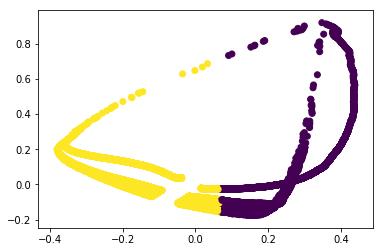

Comparing k-means clusters against the data:
country   CAN    USA
row_0               
0         788   7664
1        1376  19275


In [10]:
from sklearn.cluster import KMeans
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Shows that we are correctly classifying 20063 but missed around 9040. This means that our accuracy is around 68.9% for this model. 

Number of estimated clusters: 5


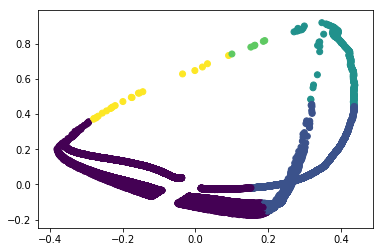

Comparing the assigned categories to the ones in the data:
col_0        0     1    2  3   4
country                         
CAN       1775   370   16  1   2
USA      22334  4310  270  5  20


In [11]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y,labels))

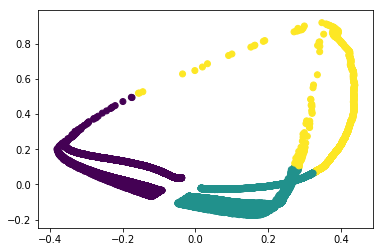

Comparing the assigned categories to the ones in the data:
col_0        0      1     2
country                    
CAN        926   1113   125
USA      12575  12295  2069


In [12]:
from sklearn.cluster import SpectralClustering

# Look for 3 clusters
n_clusters=3

# Create SpectralClustering model, with n_clusters
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_pca)

#create our prediction.
predict=sc.fit_predict(X_pca)

#Graph results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y,predict))

In [13]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
af = AffinityPropagation().fit(X_pca)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


MemoryError: 